In [6]:
import nltk

In [5]:
# downloading necessary corpus

# nltk.download_shell()

In [3]:
messages = [line.rstrip() for line in open('spamsmscollection/SMSSpamCollection-Copy1')]

In [7]:
len(messages)

5574

In [8]:
messages[9]

'spam\tHad your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030'

In [9]:
for mess_no, messages in enumerate(messages[:10]):
    print(mess_no, messages)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [10]:
import pandas as pd

In [11]:
messages = pd.read_csv('spamsmscollection/SMSSpamCollection-Copy1', sep= '\t', names = ['label', 'messages'])

In [12]:
messages.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
messages

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Exploratory Data Analysis


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
messages.groupby('label').describe()

messages                                                               
         count unique                                                top freq
label                                                                        
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [17]:
messages['length'] = messages['messages'].apply(len)

In [18]:
messages.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


<AxesSubplot:xlabel='label', ylabel='count'>

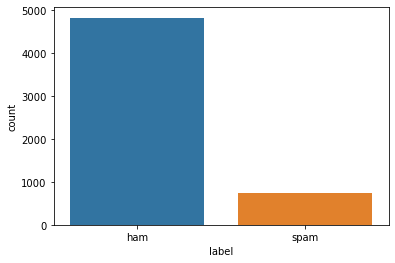

In [19]:
sns.countplot(x= 'label', data = messages)

In [20]:
new_label = pd.get_dummies(messages['label'], drop_first= True)
new_label

,spam
0,0
1,0
2,1
3,0
4,0
...,...
5567,1
5568,0
5569,0
5570,0


In [21]:
final_messages = pd.concat([messages, new_label], axis=1)
final_messages.drop('label', axis=1, inplace=True)

final_messages

,messages,length,spam
0,"Go until jurong point, crazy.. Available only ...",111,0
1,Ok lar... Joking wif u oni...,29,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,U dun say so early hor... U c already then say...,49,0
4,"Nah I don't think he goes to usf, he lives aro...",61,0
...,...,...,...
5567,This is the 2nd time we have tried 2 contact u...,160,1
5568,Will ü b going to esplanade fr home?,36,0
5569,"Pity, * was in mood for that. So...any other s...",57,0
5570,The guy did some bitching but I acted like i'd...,125,0


<AxesSubplot:>

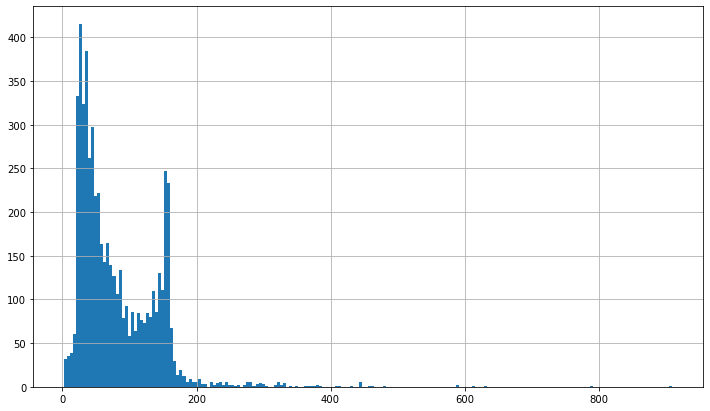

In [22]:
messages['length'].hist(bins=200, figsize=(12,7))

In [23]:
messages['length'].max()

910

In [24]:
messages[messages['length']==910]['messages'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

Text(0.5, 0, 'label')

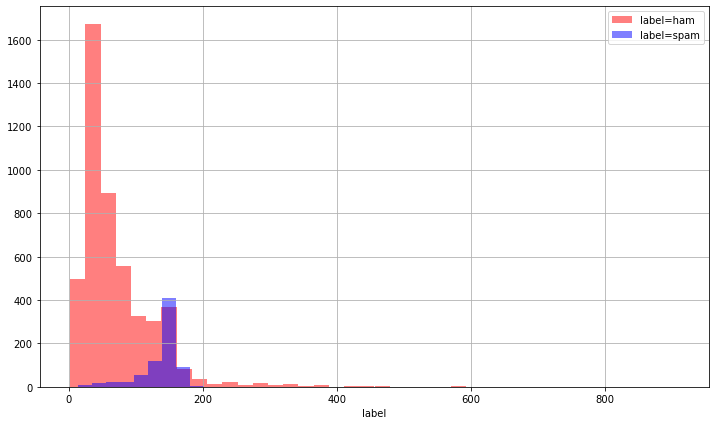

In [25]:
plt.figure(figsize=(12,7))
messages[messages['label']== 'ham']['length'].hist(alpha=0.5, bins=40, color='red',
                                                  label= 'label=ham')
messages[messages['label']== 'spam']['length'].hist(alpha=0.5, bins=10, color='blue',
                                                  label= 'label=spam')
plt.legend()
plt.xlabel('label')

In [28]:
# messages.hist(columns='length', by='label', bins=60, figsize=(12,7))

## Example of Removing punctuation and making words as vectors

In [29]:
import string

In [30]:
mess = 'Salute message! Ankit ;  is a talented boy....'

In [31]:
no_punc = [c for c in mess if c not in string.punctuation]

In [32]:
from nltk.corpus import stopwords

In [33]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
print(mess)

print('\n')

nopunc = ''.join(no_punc)

nopunc

Salute message! Ankit ;  is a talented boy....




'Salute message Ankit   is a talented boy'

## Another Example of  .join() function

In [35]:
# x = ['a', 'b', 'c', 'd']

In [36]:
# x

In [37]:
# print(''.join(x))

# '==='.join(x)

In [38]:
nopunc.split()

['Salute', 'message', 'Ankit', 'is', 'a', 'talented', 'boy']

In [39]:
clean_mess = [word for word in nopunc.split() if word not in stopwords.words('english')]

In [40]:
clean_mess

['Salute', 'message', 'Ankit', 'talented', 'boy']

## Creating a custom function for word cleaning

In [41]:
def text_cleaner(mess):
    """
    Steps
    
    1. Remove Punctuations
    2. Remove stopwords
    3. Return list of clean text messsage
    
    """
    no_punc = [char for char in mess if char not in string.punctuation]
    
    no_punc = ''.join(no_punc)
    
    return [words for words in no_punc.split() if words.lower() not in stopwords.words('english')]

In [42]:
messages.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [46]:
messages['messages'].head().apply(text_cleaner)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: messages, dtype: object

## Creating Cleaned Words to Vectors

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
# Creating Bag of words Transformer

bow_transformer = CountVectorizer(analyzer=text_cleaner).fit(messages['messages'])

In [56]:
print(len(bow_transformer.vocabulary_))

11425


In [57]:
mess4 = messages['messages'][3]

In [58]:
print(mess4)

U dun say so early hor... U c already then say...


In [59]:
bow4 = bow_transformer.transform([mess4])

In [60]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [62]:
print(bow4.shape)

(1, 11425)


In [70]:
# Getting the features(words) of vector occurred twice

print(bow_transformer.get_feature_names()[4068])
print('\n')
print(bow_transformer.get_feature_names()[9554])

U


say


## Sparse Matrix & Sparsity

In [68]:
messages_bow = bow_transformer.transform(messages['messages'])

In [69]:
print('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


In [71]:
# Getting No. of Non-zero elements of Sparse Matrix

messages_bow.nnz

50548

In [76]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))

print('Sparsity: {}'.format(sparsity))
print('\n')
print('Sparsity: {}'.format(round(sparsity)))  # Getting the Round-off value of Sparsity

Sparsity: 0.07940295412668218


Sparsity: 0


In [77]:
import warnings

## Tf-idf Transformer

In [78]:
from sklearn.feature_extraction.text import TfidfTransformer

In [81]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [84]:
tfidf4 = tfidf_transformer.transform(bow4)

In [85]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [87]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [88]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

## Naive Bayes Algorithm

In [89]:
from sklearn.naive_bayes import MultinomialNB

In [90]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [93]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [94]:
messages['label'][3]

'ham'

In [97]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [101]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

## Train Test Split

In [99]:
from sklearn.model_selection import train_test_split

In [111]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['messages'], 
                                                                messages['label'], test_size= 0.3, random_state=101)

## Pipeline Feature

In [103]:
from sklearn.pipeline import Pipeline

In [109]:
pipeline = Pipeline([('bow',CountVectorizer(analyzer= text_cleaner)), 
                     ('tfidf', TfidfTransformer()),
                     ('classifier', MultinomialNB())    # Put Any Algorithm we want to use for training
                    ])

In [105]:
pipeline.fit(msg_train, label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_cleaner at 0x0000023B743C7160>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [107]:
predictions = pipeline.predict(msg_test)

In [108]:
from sklearn.metrics import classification_report 

In [110]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1475
        spam       1.00      0.65      0.79       197

    accuracy                           0.96      1672
   macro avg       0.98      0.83      0.88      1672
weighted avg       0.96      0.96      0.96      1672

